## INTRODUCTION

Pada modul sebelumnya telah sedikit dibahas tentang beberapa macam kategori machine learning yaitu, supervised, unsupervised, semi-supervised, dan reinforcement learning. 

Semi supervised merupakan gabungan dari supervised dan unsupervised. Dan reinforcement learning dapat dianggap sebagai robot yang belajar untuk mendapatkan reward terbanyak.

Tiap kategori memiliki beberapa jenis seperti, supervised learning yang terbagi menjadi classification dan regression, unsupervised yang terbagi menjadi clustering, pendeteksian anomali, dan pengurangan dimensi. Pada modul ini akan dibahas lebih lanjut mengenai jenis-jenis dari setiap kategori.

## MACHINE LEARNING WORKFLOW

Dalam sebuah project machine learning ada tahapan-tahapan yang perlu dilalui sebelum project tersebut bisa diimplementasi di tahap produksi. Berikut adalah tahapan-tahapan yang dimaksud menurut buku Hands on Machine Learning karya Aurelien Geron:

1. Exploratory Data Analysis
Exploratory data analysis atau EDA bertujuan sebagai analisa awal terhadap data dan melihat bagaimana kualitas data.
2. Data preprocessing and Data Cleaning
Data preprocessing dan cleaning adalah tahap di mana data diolah lebih lanjut sehingga data siap dipakai dalam pengembangan ML
3. Model selection
Di tahap ini kita mulai memilih model yang akan dipakai serta melakukan optimasi parameter dari model tersebut.
4. Model Evaluation
Kita lalu melakukan evaluasi terhadap model dengan melihat performanya terhadap data testing.
5. Deployment
Ketika model dievaluasi, model siap untuk dipakai pada tahap produksi
6. Monitoring
Model yang telah dipakai dalam tahap produksi masih harus tetap dimonitor untuk menjaga kualitasnya. Pada tahap produksi model bisa saja menemukan data yang tidak dikenali sehingga performa model dapat menurun.

## ML and Business Intelligence


Business Intelligence adalah sebuah bidang yang mengumpulkan data, lalu melihat kenapa sesuatu terjadi di masa lalu. Contohnya di kasus sebuah perusahan produsen coklat. Dari data tahunan yang dikumpulkan, perusahaan tersebut melihat persediaan coklat selalu habis di bulan Februari. Dari hasil analisis data lampau tersebut diketahui bahwa penjualan coklat meningkat di bulan tersebut karena adanya Hari Valentine. Maka melihat pola di masa lampau tersebut, perusahaan dapat mengambil keputusan di tahun berikutnya untuk meningkatkan produksi coklat agar meraih lebih banyak profit.

Sedikit berbeda dengan machine learning pada ML jenis regresi, kita membuat model dengan data di masa lampau dan kita menggunakan data tersebut untuk memprediksi apa yang akan terjadi di masa mendatang. Jadi, dapat disimpulkan bahwa BI adalah bidang yang menjelaskan kenapa suatu hal terjadi di masa lampau dan ML adalah bidang yang mencoba memprediksi apa yang akan terjadi di masa mendatang.

## ML and Analytics

Di industri, bidang analisis dan machine learning hampir selalu bekerja berdampingan. Analis memungkinkan melihat lebih dalam suatu masalah lalu menentukan apakah masalah tersebut bisa diselesaikan dengan machine learning atau tidak.

Setelah masalah diidentifikasi, maka peran seorang machine learning developer adalah mengimplementasi, mulai dari mengumpulkan data, memilih model yang sesuai, melakukan deployment, dan memonitor model tersebut.

## DECISION TREE

In [1]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn import  tree
iris = datasets.load_iris()

In [2]:
x=iris.data
y=iris.target

In [3]:
clf = tree.DecisionTreeClassifier()

In [4]:
scores = cross_val_score(clf, x, y, cv=5)

In [5]:
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

Secara umum jika hasil dari pengujian tiap fold pada cross validation memiliki nilai yang bervariasi dari 0.85 sampai 0.99, maka model tersebut dapat dikatakan baik

In [8]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.datasets import load_iris

In [16]:
iris = pd.read_csv('Iris.csv')

In [17]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [18]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width' ]]

In [19]:
y = iris['species']

### Decision Tree

In [20]:
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
# melakukan pelatihan model terhadap data
tree_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
# tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
tree_model.predict([[6.2, 3.4, 5.4, 2.3]])

array(['virginica'], dtype=object)

In [41]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

### REGRESI LINIER

In [42]:
import numpy as np
import matplotlib.pyplot as plt
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
#data harga rummah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

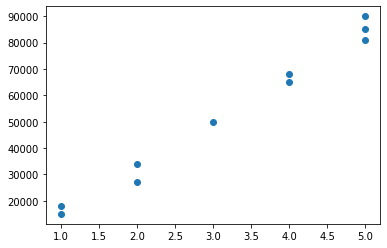

In [43]:
# menampilkan scatter plot dari dataset
%matplotlib inline
plt.scatter(bedrooms, house_price)

In [44]:
from sklearn.linear_model import LinearRegression
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

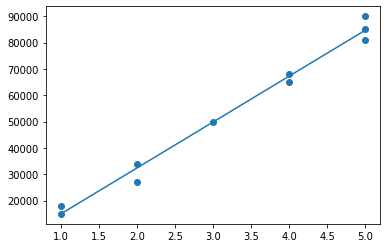

In [45]:
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

### REGRESI LINIER

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Social_Network_Ads.csv')

In [48]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [50]:
data = df.drop(columns=['User ID'])
data = pd.get_dummies(data)
data

Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0     19            19000          0              0            1
1     35            20000          0              0            1
2     26            43000          0              1            0
3     27            57000          0              1            0
4     19            76000          0              0            1
..   ...              ...        ...            ...          ...
395   46            41000          1              1            0
396   51            23000          1              0            1
397   50            20000          1              1            0
398   36            33000          0              0            1
399   49            36000          1              1            0

[400 rows x 5 columns]

In [51]:
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased'] 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
model.score(X_test, y_test)

0.63

### K-MEAN CLUSTERING

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')
# tammpilkan 3 baris pertama
df.head(3)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6

In [58]:
# ubah namma kolom
df = df.rename(columns={'Genre': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
# tampilkan data yang sudah di preprocess
df.head(3)

CustomerID  gender  age  annual_income  spending_score
0           1       1   19             15              39
1           2       1   21             15              81
2           3       0   20             16               6

In [59]:
from sklearn.cluster import KMeans
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

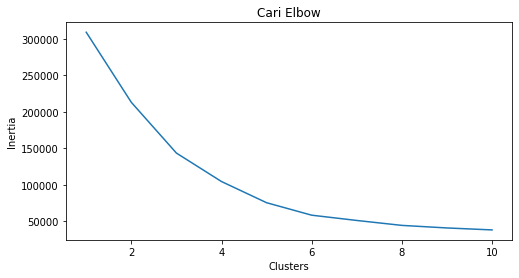

In [60]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

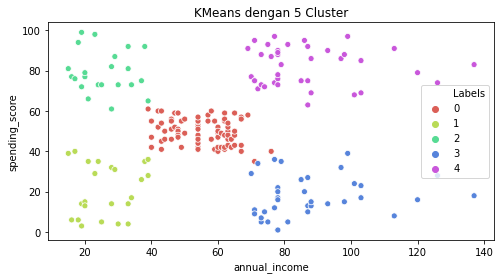

In [61]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

### REDUKSI DIMENSI

In [62]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [63]:
iris = datasets.load_iris()
atribut = iris.data
label = iris.target
# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2)

In [64]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

0.9

In [65]:
# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92581489, 0.0513898 , 0.01708827, 0.00570704])

In [67]:
## banyaknya komponen dipilih 2
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [68]:
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.9333333333333333

### SUPPORT VECTOR MACHINE

In [69]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [70]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [72]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
### standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [76]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
clf.score(X_test, y_test)

0.7559055118110236

### SUPPORT VECTOR REGRESSION

Digunakan ketika model regresi tidak linier

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
data = pd.read_csv('Salary_Data.csv')

In [83]:
data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [85]:
import numpy as np
X = data['YearsExperience']
y = data['Salary']
X = X[:,np.newaxis]

In [86]:
from sklearn.svm import SVR
model  = SVR(C=1000, gamma=0.05, kernel='rbf')
model.fit(X,y)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

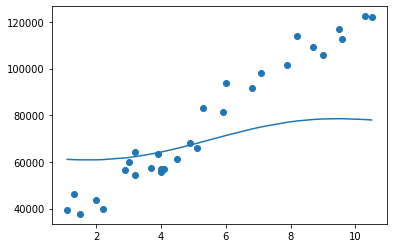

In [87]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model.predict(X))

## MODEL EVALUATION

#### Overfitting underfitting
Salah satu hal yang paling penting untuk diperhatikan saat mengembangkan model ML adalah mengecek apakah model tersebut underfit atau overfit (arti dari masing-masing model akan kami jelaskan di bawah ini).

Sebuah model ML yang layak untuk di-deploy di tahap produksi adalah model yang tidak underfit atau overfit. Sebuah model yang tidak overfit dan underfit juga disebut dengan model good fit. Model yang bukan good fit cenderung akan memiliki performa sangat buruk di tahap produksi.

Bagaimana untuk melihat apakah sebuah model overfit atau underfit?

Salah satu caranya telah kita pelajari sebelumnya, yakni dengan membagi dataset menjadi train set dan test set. Setelah data tersebut dibagi, kita akan melakukan pengembangan model hanya dengan data training. Hasil pengujian model terhadap data testing dapat memberitahu kita apakah model kita underfit atau overfit.

### Underfitting
Underfit terjadi ketika model terlalu sederhana dan tidak mampu untuk menyesuaikan pola yang terdapat pada data latih. Bagaimana untuk mengenali apakah sebuah model underfit atau tidak?

Sebuah model dapat dikatakan underfit jika memiliki eror yang tinggi pada data training. Underfitting menandakan bahwa model tersebut belum cukup baik dalam mengenali pola yang terdapat pada data latih. Misalnya ketika sebuah model dilatih pada data latih yang memiliki 50 sampel coklat dan 50 sampel kacang. Setelah pembelajaran dengan data latih, model malah mengenali pada data latih terdapat 90 sampel coklat dan 10 sampel kacang.

Pada kasus klasifikasi, underfitting ditandai ketika model memiliki akurasi yang rendah pada data training. Pada kasus regresi, underfitting terjadi ketika model memiliki tingkat eror yang tinggi.

#### Overfitting
Overfitting terjadi ketika model terlalu memiliki prediksi yang sangat baik pada data training, namun prediksinya buruk pada data testing. Ketika sebuah model overfit, model akan membuat banyak kesalahan dalam memprediksi data-data baru yang ditemui pada tahap produksi.

Contoh kasus adalah sebuah model machine learning untuk mengenali gambar anjing. Sebuah model yang overfit akan sangat menyesuaikan dengan dataset. Nah, di dataset mayoritas dari gambar anjing adalah anjing berwarna hitam. Maka model akan berpikir bahwa setiap hewan yang berwarna hitam adalah anjing. Ketika model tersebut dipakai untuk memprediksi sebuah gambar kucing dan kuda berwarna hitam, maka prediksinya adalah anjing.

Sebelum men-deploy model ML ke tahap produksi, ada teknik sederhana untuk mengecek apakah model overfit atau tidak. Pada model klasifikasi jika adalah akurasi model pada data training tinggi dan data testing rendah, maka model yang Anda kembangkan overfitting. Pada model jenis regresi, jika model membuat kesalahan yang tinggi pada data testing maka model tersebut overfitting.

## MODEL SELECTION

Ketika mengembangkan model K-Means seperti di atas, mengubah parameter - dalam hal ini memilih jumlah n_cluster - merupakan bentuk dari tuning parameter.

Tuning Parameter adalah istilah yang digunakan untuk meningkatkan performa model machine learning. Proses ini mirip dengan proses tweak. Misalnya pada komputer di mana kita mengganti komponen komputer sehingga peranti tersebut memiliki performa lebih tinggi demi kinerja efisien. Pada model K-means di atas, jumlah cluster yang kurang atau terlalu banyak akan menyebabkan hasil pengklasteran kurang optimal. Tuning parameter dalam hal ini adalah bereksperimen mencari parameter terbaik untuk model K-Means tersebut.

Tujuan melakukan tuning pada model yaitu agar model memiliki tingkat eror yang lebih kecil atau akurasi yang lebih baik. Sebuah contoh dari tuning parameter adalah pada kasus spam filter, di mana model spam filter yang telah di-tuning akan lebih akurat dalam mendeteksi email spam, dan melakukan lebih sedikit kesalahan dalam memprediksi email spam yang bukan spam.

Berbagai model machine learning dari library SKLearn memiliki parameter-parameter yang bisa kita ubah untuk meningkatkan performa dari sebuah model tersebut. Contohnya pada decision tree terdapat beberapa parameter seperti di bawah. Kalau Anda tertarik mengetahui berbagai jenis model machine learning dan parameter setiap model tersebut, kunjungi tautan berikut yah.

#### Grid Search
Grid search memungkinkan kita menguji beberapa parameter sekaligus pada sebuah model. Contohnya kita bisa menguji beberapa jumlah cluster untuk sebuah model K-Means dan melihat bagaimana performa model K-Means terhadap nilai K yang berbeda. Untuk lebih memahami grid search, kita akan mencoba grid search menggunakan SKLearn.

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Salary_Data.csv')

In [93]:
import numpy as np

X = data['YearsExperience']
y = data['Salary']
X = X[:,np.newaxis]

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)
grid_search.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [96]:
## model SVM baru
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

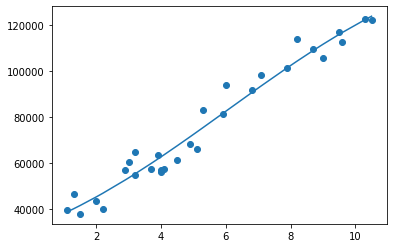

In [97]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

## Adding/reducing features

Andrew Ng, seorang profesor kecerdasan buatan dari Stanford dan pencetus Google Brain mengatakan bahwa “Menciptakan fitur-fitur yang baik adalah pekerjaan yang sulit, memakan waktu, dan membutuhkan pengetahuan seorang pakar di bidang terkait. Machine learning terapan pada dasarnya adalah rekayasa fitur.”

#### Binning
Binning adalah pengelompokan nilai sesuai dengan batas besaran yang ditentukan. Pada binning, data dikelompokkan dalam tiap ‘bin’ sesuai dengan nilai yang cocok dengan bin tersebut. Bin sederhananya adalah sebuah kategori yang menampung nilai-nilai tertentu.

Ada beberapa jenis binning di mana salah satu contohnya adalah binning jarak. Pada binning jarak, nilai-nilai dari sebuah atribut akan dikategorikan ke dalam jumlah bin tertentu yang memiliki interval sama besar. Pada gambar dibawah dapat dilihat contoh kumpulan nilai yang dibagi menjadi 4 bin, 8 bin, dan 16 bin.

Binning bisa membantu untuk menghindari overfitting. Namun binning juga mengorbankan informasi yang terkandung dari sebuah atribut sehingga, penggunaanya perlu dilakukan dengan teliti. 

#### Splitting
Memisahkan sebuah atribut menjadi atribut-atribut baru juga merupakan salah satu cara yang berguna. Dengan splitting, kita membuat atribut lebih dipahami sebuah model machine learning. Contoh kasusnya adalah sebuah atribut dengan judul “ram_hardisk” yang berisi informasi mengenai besar ram dan penyimpanan dari harddisk. Kita dapat memisahkan atribut tersebut menjadi “ram” dan “storage” untuk memudahkan model mendapatkan informasi lebih banyak dari atribut baru.



#### Interaction feature
Kita juga bisa menciptakan atribut baru dari atribut-atribut yang ada. Contohnya kita memiliki 2 atribut yaitu “penjualan_pena_biru” dan “penjualan_pena_hitam”. Kita bisa membuat atribut baru dari dua atribut sebelumnya yaitu “penjualan_pena” ketika kita hanya membutuhkan informasi tentang penjualan pena semua warna.